In [1]:
import numpy as np 
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,InputLayer,Reshape

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

from keras.layers import LeakyReLU
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import math
import pandas as pd
import datetime
import time
import csv
import numpy as np

from sklearn.model_selection import train_test_split

import os
from PIL import Image
import sys

import cv2 

In [2]:
#image padding 
white = [255,255,255]
def pad_img(x,scale):  
        #print(x.shape)
        h,w = x.shape[:2]
        h=min(h,scale[1])
        w=min(w,scale[0])
        diff_vert = scale[1] - h
        pad_top = diff_vert//2
        pad_bottom = diff_vert - pad_top
        diff_hori = scale[0] - w
        pad_left = diff_hori//2
        pad_right = diff_hori - pad_left
        x=cv2.copyMakeBorder(x, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=white)
        #assert x.shape[:2] == scale 
        #padding = (pad_left, pad_top, pad_right, pad_bottom)
        #x=ImageOps.expand(x, padding)
        #x =cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
        #print(x.shape)
        #print("-----------------",x)
        return x;

In [3]:
def getData(pathd,scale):
    image_dir=Path(pathd)
    Alldatas=[]
    img_data=[]
    for i in  image_dir.iterdir():
        #print(i)
        img_data.append(i)
     
    for i in img_data:
        img=load_img(i)
        x=img_to_array(img)
        h,w = x.shape[:2]
        print(h,w)
        hh=scale[1];
        ww=scale[0];
        if(h%scale[1]!=0):
            ff=h/scale[1];
            hh=((int(ff)+1)*scale[1])
            
        if(w%scale[0]!=0):
            ff=w/scale[0];
            ww=((int(ff)+1)*scale[0])
        
        new_scale=(ww,hh)
        print(new_scale)
        x=pad_img(x,new_scale)
        Alldatas.append(x)
    return Alldatas

In [4]:
scale=(540,420)
all_img=getData(r"E:\class note\2020-Fall\input",scale)
#all_img=tf.image.rgb_to_grayscale(all_img)

2243 1580
(1620, 2520)


1
1 img shape  (2520, 1620, 3)


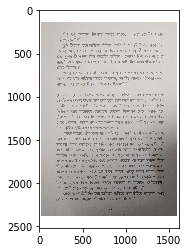

In [5]:
print(len(all_img))
for i in range(1,len(all_img)+1):
    im=all_img[i-1]
    print(i,"img shape ",im.shape)
    #print(im)
    im=array_to_img(im)
    plt.imshow(im,cmap="gray")
    plt.show()
    #cv2.imwrite(r'E:\class note\2020-Fall\output\\'+str(i)+'.jpg',np.array(im))
    

(540, 420)
1
1 img shape  (2520, 1620, 3)
3 6
1
0 540 0 420
(420, 540, 3)
2
540 1080 0 420
(420, 540, 3)
3
1080 1620 0 420
(420, 540, 3)
4
0 540 420 840
(420, 540, 3)
5
540 1080 420 840
(420, 540, 3)
6
1080 1620 420 840
(420, 540, 3)
7
0 540 840 1260
(420, 540, 3)
8
540 1080 840 1260
(420, 540, 3)
9
1080 1620 840 1260
(420, 540, 3)
10
0 540 1260 1680
(420, 540, 3)
11
540 1080 1260 1680
(420, 540, 3)
12
1080 1620 1260 1680
(420, 540, 3)
13
0 540 1680 2100
(420, 540, 3)
14
540 1080 1680 2100
(420, 540, 3)
15
1080 1620 1680 2100
(420, 540, 3)
16
0 540 2100 2520
(420, 540, 3)
17
540 1080 2100 2520
(420, 540, 3)
18
1080 1620 2100 2520
(420, 540, 3)


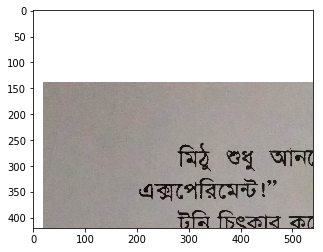

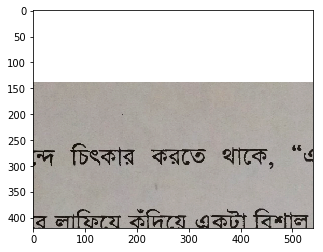

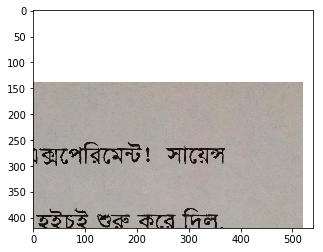

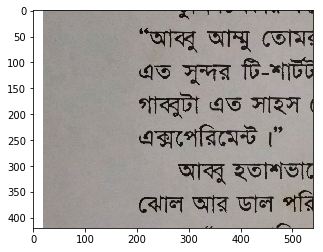

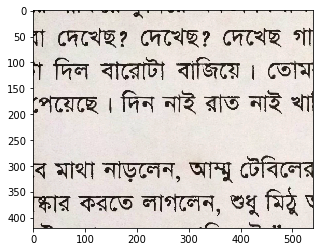

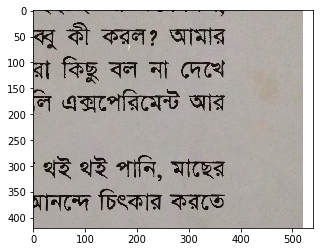

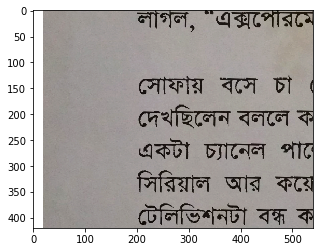

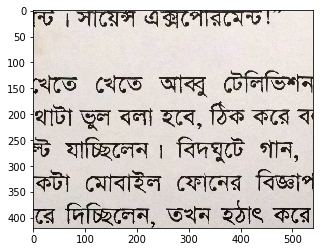

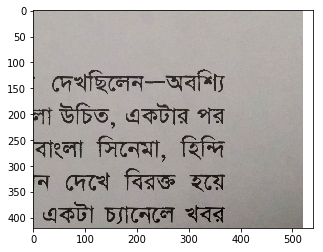

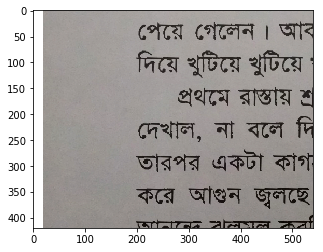

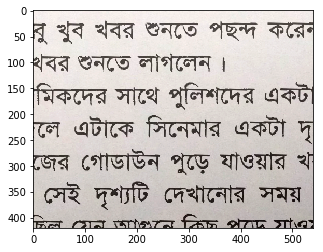

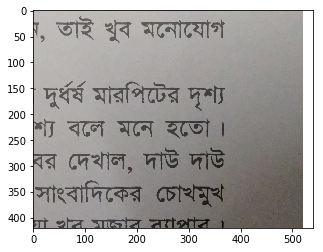

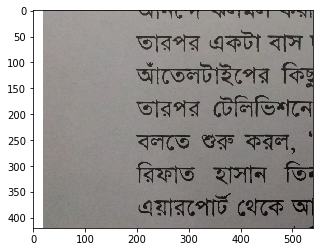

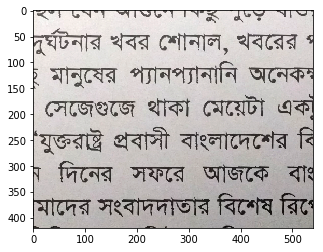

In [ ]:
from collections import defaultdict

print(scale)
print(len(all_img))
ff=0
for k in range(1,len(all_img)+1):
    img=all_img[k-1]
    print(k,"img shape ",img.shape)
    height,width=img.shape[:2]
    #img=array_to_img(im)
    
    imag = {}
    width=int(width/scale[0])
    height=int(height/scale[1])
    
    print(width,height)
    w=scale[0]
    h=scale[1]
    f=0
    
    for i in range(0,height):
        for j in range(0,width):
         
            ws=j*w;
            we=(j+1)*w;
            hs=i*h
            he=(i+1)*h
            f+=1
            print(f)
            print(ws,we,hs,he)
            crop_img1= img[hs:he,ws:we]
            
            print(crop_img1.shape)
            #im=array_to_img(crop_img1)
            #plt.imshow(im,cmap="gray")
            #plt.show()
            imag[(i,j)]=(crop_img1)
    
    for i in range(0,height):
        for j in range(0,width):
            ff+=1
            #print(imag[(i,j)]);
            im=array_to_img(imag[(i,j)])
            #print(j)
            plt.imshow(im,cmap="gray")
            plt.show()
            
            cv2.imwrite(r'E:\class note\2020-Fall\pc1_1\\'+str(ff)+'.png',np.array(imag[(i,j)]))
    
    
    v1=imag[(0,0)]
    for j in range(1,width):
        v1 = np.concatenate((v1, imag[(0,j)]), axis=1)        
    v2=v1
    
    for i in range(1,height):
        vv=imag[(i,0)]
        for j in range(1,width):     
            vv=np.concatenate((vv, imag[(i,j)]), axis=1)
        v2=np.concatenate((v2, vv), axis=0)
    
    im=array_to_img(v2)
    cv2.imwrite(r'E:\class note\2020-Fall\\'+str(k)+'.jpg',np.array(im))
    
    




